<h1><b>A Journey Through How the Share of Women in National Parliaments Impacts Environmental Policy Enforcement</b></h1>

![Image Alt Text](https://drive.google.com/uc?id=1Bru_osrhJ5a8ExrcEcexj6BKJaICKoay)


#Why should you join us on this journey? 🏃🚀


>  *The future of our Earth might depend on who sits in the seats of power.*









![COP28 Summit in Dubai](https://drive.google.com/uc?id=1tokz3g58gbHrAY0t3dPuac8P58v6kbvG)

*Image 1: Heads of state and government at the COP28 Summit in Dubai. Source: The New York Times (2023)*

Did you know that as of 2022, men occupied 74% of seats in parliaments worldwide (The World Bank, 2023)? At the COP28 Summit, this disparity was evident with a majority of male heads of state and government in attendance (Image 1). But what if the key to unlocking more effective climate change legislation lies in changing this ratio? What if increasing female representation in parliaments could be a pivotal step towards enforcing robust and effective climate change laws to limit global temperature rise to 1.5ºC and prevent irreversible damage to our planet?  

![Image Alt Text](https://drive.google.com/uc?id=1FpI-tRg3aUJbV-RxLgjU25VfESLlafvY)

*Figure 1: Mechanism of the impact of women political representation on the enforcement of environmental policies*



Building on the premise that females may exhibit greater empathy than males (Greenberg et al. 2022), which could incline them towards supporting more stringent climate change legislation, we also find that traits such as values relevant for climate change action are more pronounced in females (Gilligan, 1982; Beutel and Marini, 1995). Gender differences in public attitudes toward climate change suggest women generally have greater awareness and concern about the issue (McCright, 2010; McCright and Dunlap, 2011).

Within this framework (Figure 1), we posited a question: Could an increased presence of women in parliaments lead to the enactment of more robust and effective climate change policies? Our exploration of scholarly literature led us to "Gender and climate change: Do female parliamentarians make a difference?" (Mavisakalyan et al. 2019), which informed the foundation of our study. This paper also employs a 2SLS and utilizes both full and partial identification approaches. However, we envisioned extending their findings by utilizing an alternative index and a more expansive dataset to potentially amplify and refine the results.

Let's embark on this journey together, exploring how a shift in parliamentary gender balance could be a key driver in our global response to climate change.

#Gathering Our Gear: Assembling Data for the Expedition 💼📊

![Image Alt Text](https://drive.google.com/uc?id=1CzmvYAGh6tXnTvAdMJYw68xpmUhCNuOA)


Before we embark on our expedition to uncover the impact of women in national parliaments on environmental policy enforcement, we must pack our analytical suitcase with the necessary data.

We measure female political representation by the **percentage of parliamentary seats they occupy** and juxtapose this with the **Environmental Policy Stringency Index**, which assesses the extent to which environmental policies rigorously discourage polluting or environmentally harmful behavior.

However, this intricate relationship is influenced by several additional factors that require our attention:

- **GDP per capita**: Wealthier countries may exhibit more progressive gender dynamics and promote gender equality, and have more resources to implement and enforce environmental policies (Fredriksson and Neumayer, 2013).
- **Political regime**: Democracies tend to promote gender representation and the enactment of environmental regulations more vigorously than autocracies (Murdoch and Sandler, 1997; Farzin and Bond, 2006).
- **Gender quotas**: Policies requiring a minimum level of female representation in parliament lead to an increase in the share of women in parliament.
- **Years since suffrage**: The duration of women's participation in elections may increase the share of women in parliament as societal norms evolve to support greater gender inclusion.
- **Trade openness**: While trade openness can foster cooperation on environmental challenges, it may also hinder it if exporting countries’ interests are threatened (Fredriksson and Neumayer, 2013).
- **CO2 emissions per capita**: Countries with higher carbon emissions per capita may have less strict environmental regulations, possibly due to influential high-emission industries lobbying to protect their interests (Fredriksson and Neumayer, 2013).
- **Fertility rate**: Serving as a proxy for women's empathy, this variable may strengthen the relationship between women in parliament and environmental policy stringency (Warrier et al., 2018; Wolf et al., 2021).

All variables and their relationships are summarized in Figure 2.

![Image Alt Text](https://drive.google.com/uc?id=1duBtZF5GLq6GPdCQnIBFWYBa5EKgyqhi)

*Figure 2: Directed Acyclic Graph (DAG)*




With this in mind, we can now install a few essential Python packages and libraries and import our cleaned dataset, which merges data from multiple sources indicated in Appendix 1.

##<h4>Python Packages & Libraries</h4>

In [156]:
pip install graphviz

In [157]:
pip install stargazer

In [158]:
# Installing a few useful packages
!pip install stargazer linearmodels


# Importing a few useful libraries
# Standard libraries
import itertools

# Data processing and analysis libraries
import pandas as pd
import geopandas as gpd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import MaxNLocator

# Statistical and machine learning libraries
from scipy.stats import skew, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from linearmodels.panel import PanelOLS
from stargazer.stargazer import Stargazer
import graphviz as gr

##<h4>Database</h4>

In [159]:
# Importing our merged and cleaned database
url = "https://raw.githubusercontent.com/vgentile98/zebraproject/main/data/merged_cleaned_dataset.xlsx"
df_merged = pd.read_excel(url)
df_merged.head()

,country_name,country_code,year,women_seats,stringency_index,fertility_rate,gdp,log_gdp,openness,co2,polity,education,years_since_suffrage,quota
0,Australia,AUS,1997,15.540541,0.458333,1.778,60992.006910,11.018498,37.980832,16.706176,10,11.068,95,0
1,Australia,AUS,1998,15.540541,0.770833,1.762,63203.100413,11.054109,39.992702,17.602334,10,11.052,96,0
2,Australia,AUS,1999,22.448980,1.020833,1.755,65658.498095,11.092222,39.029795,17.737243,10,11.036,97,0
3,Australia,AUS,2000,22.972973,0.979167,1.756,67456.847783,11.119243,40.935211,17.837318,10,11.020,98,0
4,Australia,AUS,2002,25.333333,1.212500,1.756,69849.773355,11.154102,41.449092,18.123211,10,11.160,100,0


In [160]:
# Get quick overview of our merged database
df_merged.describe()

,year,women_seats,stringency_index,fertility_rate,gdp,log_gdp,openness,co2,polity,education,years_since_suffrage,quota
count,518.000000,518.000000,518.000000,518.000000,5.180000e+02,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2004.586873,21.341820,1.772096,1.730982,1.712857e+06,11.478919,73.184665,8.209846,8.818533,9.802355,75.907336,0.113900
std,4.610893,11.123143,0.958241,0.451155,5.662609e+06,1.999151,36.925514,4.112843,3.140471,2.168665,16.228992,0.317996
min,1997.000000,2.363636,0.375000,1.085000,7.646798e+03,8.942042,16.438585,0.817360,-7.000000,3.200000,26.000000,0.000000
25%,2001.000000,12.048193,0.854167,1.370000,2.853587e+04,10.258916,49.584058,5.744393,9.000000,8.505000,62.250000,0.000000
50%,2005.000000,19.659443,1.710417,1.669000,4.136748e+04,10.630250,62.177875,7.968186,10.000000,10.459000,80.000000,0.000000
75%,2009.000000,29.824561,2.552083,1.926750,3.186739e+05,12.671923,89.241248,10.222325,10.000000,11.400000,88.000000,0.000000
max,2012.000000,47.277937,4.133333,3.514000,3.088083e+07,17.245646,191.880382,20.330853,10.000000,13.230000,110.000000,1.000000


##  

Our analytical suitcase is nearly packed and ready for our journey. However, before we set off, it's crucial to consider the possibility of encountering data biases along the way. Just as explorers prepare for unexpected challenges, we must be aware of these potential pitfalls to navigate our quest successfully.

Here are some key considerations:
- **Data transformation**:
    - **Log transformation of GDP per capita**: While this is common practice in economic research to help normalize and reduce skewness of GDP, it's important to remember that the results will now represent percentage changes rather than absolute changes. This could affect the interpretation of the impact of GDP on other variables.
    - **High skewness of polity score**: We chose not to transform the highly skewed polity score (-4.18) to maintain the original, meaningful scale of this complex social and political measure. Transforming it could distort its interpretability and relationship with other variables in the study.
- **Linear interpolation for education**: Using linear interpolation to estimate missing education data over 5-year intervals can introduce biases due to its assumption of uniformity in educational trends, potentially misrepresenting real, non-linear changes in education levels.
- **Selection bias**: Our dataset includes 33 countries, covering all continents. It is worth nothing that South Africa and Brazil are the only countries in Africa and South America and that the dataset predominantly consists of European countries. This suggests a potential geographic bias and may limit the generalizability of the results to a global scale.
- **Control variables**: The relationship between parliamentary female representation and environmental policy enforcement is complex and influenced by many factors. Therefore, there might still be some variables lacking in our suitcase. Moreover, some variables are hard to quantify or lack data. Therefore, some proxies are used. For instance, trade openness is a good proxy for international collaboration, but it is not perfect.
<br><br>

➡ Ready to get started?

#Trailblazing Through Data: Unveiling Initial Insights 🔍💡



![Image Alt Text](https://drive.google.com/uc?id=120zw1kVC9yR7-sDkpF_rm1aCh-2jzYnr)

As we embark on our exploratory journey towards understanding causality, let’s make a first stop in the land of data visualization to see if our initial hunch holds true. Upon examining the scatter plot (Figure 3), a clear positive correlation emerges between the stringency index and the share of women in parliament. This result is in line with our hypothesis.

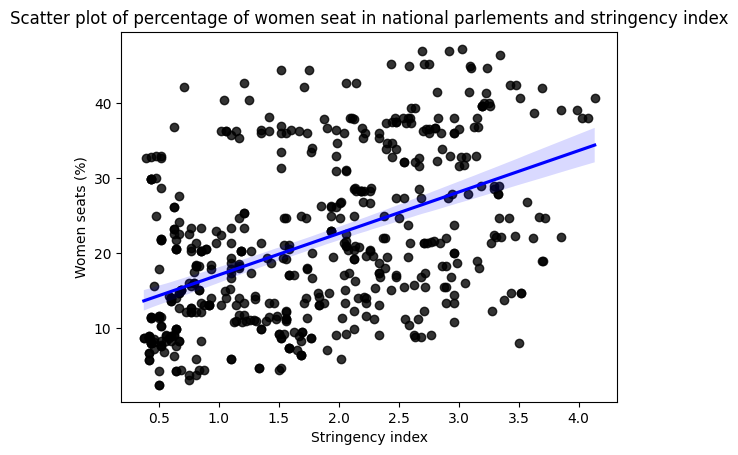

In [161]:
#@title Figure 3: Correlation between women seats and stringency index
sns.regplot(x='stringency_index',
            y='women_seats',
            data=df_merged,
            scatter_kws={'color': 'black'},
            line_kws={'color': 'blue'}
           )

plt.title("Scatter plot of percentage of women seat in national parlements and stringency index")
plt.xlabel("Stringency index")
plt.ylabel("Women seats (%)")
plt.show()

Transitioning to the bar chart (Figure 4), this trend continues. We observe a clear difference between groups in the percentage of women in national parliaments, which once again suggests that there is a potential causality.
Complementing these visual insights, an ANOVA test (Table 1) on the dependent variable confirms this isn't just a visual coincidence; there are statistically significant differences across groups based on women’s representation. The ANOVA test, a statistical method used to compare the means of different groups, indicates that the variations we observe are not random, but instead reflect real differences tied to the levels of women’s representation in parliament.
This lends statistical weight to our initial intuition and hints at a deeper relationship within the data. In this visualization checkpoint, the data seems to whisper a story in line with our hypothesis, inviting us to delve deeper into the world of statistical analysis.

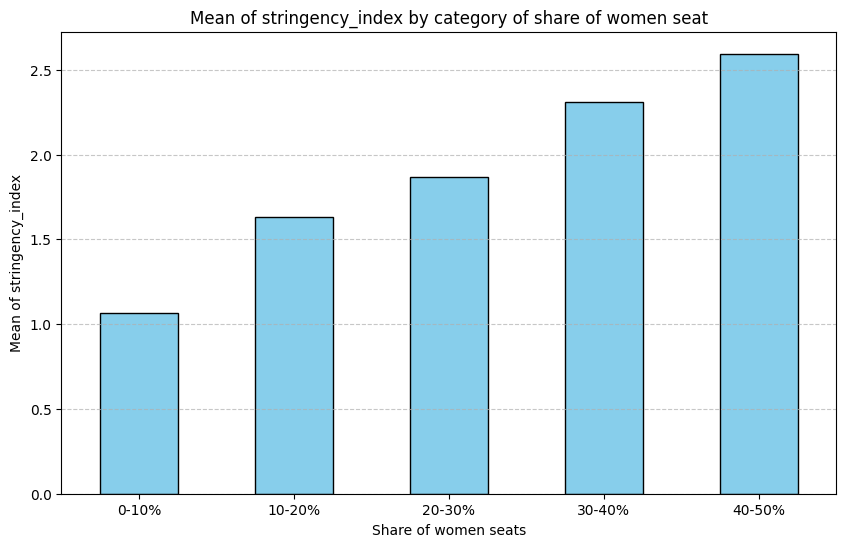

In [162]:
#@title Figure 4: Stringency Index by Group of Women Parliamentary Representation
df_merged['women_seats_category'] = pd.cut(df_merged['women_seats'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%'])

# Calculate stringency_index averages by group
means_by_category = df_merged.groupby('women_seats_category')['stringency_index'].mean()

# Create a bar graph to display averages
plt.figure(figsize=(10, 6))
means_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Share of women seats')
plt.ylabel('Mean of stringency_index')
plt.title('Mean of stringency_index by category of share of women seat')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [163]:
#@title Table 1: ANOVA Test
# Construisez une formule pour le modèle ANOVA
model = ols('stringency_index ~ C(women_seats_category)', data=df_merged).fit()

# Effectuez l'ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                             sum_sq     df         F        PR(>F)
C(women_seats_category)   97.439404    4.0  33.12256  1.373898e-24
Residual                 377.283747  513.0       NaN           NaN


#Navigating the Terrain: Unraveling Our Baseline Results with OLS 🧭📈



![Image Alt Text](https://drive.google.com/uc?id=1ne1EpK1zX2m6zuzJ-hf6sdtmdai9Q-5f)

Embarking on our statistical expedition, we're now venturing into the challenging yet exhilarating terrain of statistics! As we journey towards unraveling the mysteries of causality, our first step will be to engage with an Ordinary Least Squares (OLS) regression. This foundational approach will not only establish our baseline results but also shed light on the intricate interplays at work.

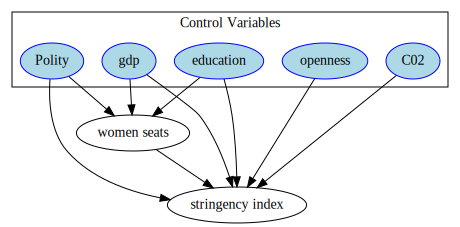

In [164]:
#@title Figure 5: DAG Recap
g = gr.Digraph()

with g.subgraph(name='cluster_controls') as c:
    c.attr(label='Control Variables')
    c.node("Polity", color='blue', style='filled', fillcolor='lightblue')
    c.node("gdp", color='blue', style='filled', fillcolor='lightblue')
    c.node("openness", color='blue', style='filled', fillcolor='lightblue')
    c.node("C02", color='blue', style='filled', fillcolor='lightblue')
    c.node("education", color='blue', style='filled', fillcolor='lightblue')

g.edge("women seats", "stringency index")
g.edge("Polity", "women seats")
g.edge("Polity", "stringency index")
g.edge("gdp", "women seats")
g.edge("gdp", "stringency index")
g.edge("openness", "stringency index")
g.edge("education", "women seats")
g.edge("education", "stringency index")
g.edge("C02", "stringency index")

g

**<h2> OLS with controls </h2>**

**The OLS model is specified as:**

$$
\
\text{Stringency_index}_{it} = \alpha + \beta_1 \text{Women_seats}_{it} + \mathbf{\beta}_2' \mathbf{X}_{it} + \epsilon_{it}
\
$$

**Dependent Variable**

Stringency Index (it): This represents the stringency of environmental policies for country i in year t.

**Model Components**

Alpha (α): The intercept of the model, indicating the baseline level of the stringency index when all independent variables are zero.

Beta 1 (β1): The coefficient for the variable "Women Seats (it)", measuring the impact of the proportion of women in parliament on the stringency index.

Women Seats (it): The primary independent variable, denoting the share of women in the parliament of country i in year t.

Beta 2 Vector (β2'): A row vector of coefficients for each control variable in the vector X(it).

Control Variables (Xit): A column vector of control variables, encompassing various economic, political, or social factors that might influence the stringency index.

Error Term (εit): The error term, accounting for variability in the stringency index not explained by the independent variables.

In [165]:
#@title Table 2: Basic OLS table
# Creating models with progressive controls
model1 = smf.ols('stringency_index ~ women_seats', data=df_merged).fit()
model2 = smf.ols('stringency_index ~ women_seats + log_gdp', data=df_merged).fit()
model3 = smf.ols('stringency_index ~ women_seats + log_gdp + polity', data=df_merged).fit()
model4 = smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness', data=df_merged).fit()
model5 = smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness + education', data=df_merged).fit()
model6 = smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness + education + co2', data=df_merged).fit()

# Using Stargazer to create a regression table
stargazer = Stargazer([model1, model2, model3, model4, model5, model6])

# Displaying the table
# stargazer.significant_digits(3)

#Decomment the following function to visualize the table (added in appendix 2)
#stargazer


In the initial OLS regression analysis (Table 2), the coefficient for women_seats is positive and statistically significant across all variations of the model, regardless of the control variables included. When the full range of control variables is accounted for, the coefficient for women_seats remains significant at 0.029*** (Significance levels marked by three asterisks denote a p-value less than 0.01, confirming the strong statistical significance of the findings.) , and the model's explain 0.401 of the total variance.

This contrasts with the model without controls, which presents a higher coefficient of 0.041*** but a lower R-squared of 0.228, demonstrating that while the estimated impact of women's parliamentary share on policy stringency slightly decreases with additional controls, its statistical significance stays.

**<h2> OLS with time fixed effects </h2>**

As we delve deeper into our analytical journey, adding **fixed effects** to our regression model is a crucial step to refine our understanding and enhance the robustness of our results. This technique helps control for time-specific, unobserved factors like environmental activism and shifts in international agreements, which can significantly influence our dependent variable, the stringency of environmental policies. By including year fixed effects, we're essentially isolating the impact of our variables of interest, such as the share of women in parliament, from these year-to-year variations. This adjustment ensures a more accurate analysis, minimizing potential biases and bringing us closer to understanding the true relationship within our data.

$$
\
\text{Stringency_index}_{it} = \alpha + \beta_1 \text{Women_seats}_{it} + \mathbf{\beta}_2' \mathbf{X}_{it} + \gamma_t + \epsilon_{it}
\
$$

**New Model Components**
γ t: The fixed effects for each year, capturing time-specific influences.

In [166]:
#@title Table 3: OLS with time fixed effects
df_merged.reset_index(inplace=True)
df_merged= df_merged.set_index(['country_name', 'year'])

# Converting all necessary variables to float to avoid data type problems
df_merged['stringency_index'] = df_merged['stringency_index'].astype(float)
df_merged['women_seats'] = df_merged['women_seats'].astype(float)
df_merged['log_gdp'] = df_merged['log_gdp'].astype(float)
df_merged['polity'] = df_merged['polity'].astype(float)
df_merged['openness'] = df_merged['openness'].astype(float)
df_merged['education'] = df_merged['education'].astype(float)
df_merged['co2'] = df_merged['co2'].astype(float)

# Creating model with year fixed effects
exog_vars = ['women_seats', 'log_gdp', 'polity', 'openness', 'education', 'co2']
exog = sm.add_constant(df_merged[exog_vars])
mod = PanelOLS(df_merged.stringency_index, exog, time_effects=True)
fe_res = mod.fit()

# Displaying results
fe_res
print("women_seats estimate:, ", fe_res.params["women_seats"])
print("women_seats p-value:, ", fe_res.pvalues["women_seats"])

women_seats estimate:,  0.022791014613366266
women_seats p-value:,  4.440892098500626e-16


With the incorporation of fixed effects, the coefficient for women_seats remains positively significant at 0.0228***, upholding its statistical significance at the 0.01 level (Table 3). This indicates that, even after adjusting for overarching time trends and unobserved variables that may vary over time yet remain consistent across countries, the positive association between women's representation in parliament and the stringency of environmental policies continues to hold true.

**<h2> Multicollinearity  </h2>**

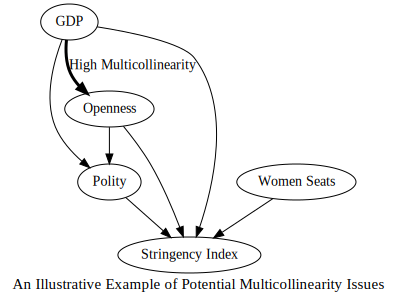

In [167]:
#@title Figure 6: Example of Multicollinearity Issue
# Creating a directed graph for the conceptual representation of multicollinearity
g = gr.Digraph()
g.attr(label=r'An Illustrative Example of Potential Multicollinearity Issues')
g.attr(fontsize='15')
# Adding nodes
g.node("GDP", "GDP")
g.node("Openness", "Openness")
g.node("Polity", "Polity")
g.node("Stringency Index", "Stringency Index")
g.node("Women Seats", "Women Seats")

# Adding edges
# Thick line between A and B for high multicollinearity
g.edge("GDP", "Openness", label="High Multicollinearity", penwidth="3.0")
# Thinner lines for weaker correlations
g.edge("GDP", "Polity", penwidth="1.0")
g.edge("Openness", "Polity", penwidth="1.0")
# Lines to the dependent variable
g.edge("GDP", "Stringency Index", penwidth="1.0")
g.edge("Openness", "Stringency Index", penwidth="1.0")
g.edge("Polity", "Stringency Index", penwidth="1.0")
# Line to the independent variable
g.edge("Women Seats", "Stringency Index", penwidth="1.0")


# Return the graph
g

Multicollinearity can arise in a regression model if variables are highly correlated, like if GDP were closely linked with Openness, potentially distorting the individual impact each has on the dependent variable (Figure 6). To ensure our model's reliability and the accuracy of each explanatory variable's interpretation, we conducted a multicollinearity check using the Variance Inflation Factor (VIF). This test confirmed that each variable uniquely contributes to the model without significant overlap (Table 4). Our results indicated that no variable had a VIF exceeding the critical threshold of 10, affirming that multicollinearity does not pose a concern for our analysis.

In [168]:
#@title Table 4: Test for multicollinearity
df_with_constant = add_constant(df_merged[exog_vars])

# VIF calculation for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
vif["features"] = df_with_constant.columns

print(vif)

   VIF Factor     features
0   52.958974        const
1    1.156649  women_seats
2    1.127321      log_gdp
3    1.195830       polity
4    1.366373     openness
5    2.970494    education
6    2.172894          co2


**<h2> Robustness Test for outliers </h2>**

Now let's check that it's not the outliers that are driving our results
The DFBETAS statistic is a tool used to identify influential data points in a statistical model; it measures how much each individual data point affects the estimated regression coefficients, helping to ensure that our conclusions are not overly swayed by a few unusual observations.
By removing observations with DFBETAS values beyond the threshold of 2/√n, we ensured our significant results were robust and not driven by a few influential data points. Interestingly, post-removal, the effect size slightly increased from 0.29\*\*\* to 0.31\*\*\*, reinforcing the positive association between women's representation in parliaments and the stringency of climate change policies, which suggests that the removed outliers were slightly suppressing the observed effect.

In [169]:
#@title Table 5: OLS without Outliers
# Resetting DataFrame indices
df_merged_reset = df_merged.reset_index(drop=True)

# Redoing the model with the indices reset
model6 = smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness + education + co2', data=df_merged_reset).fit()

dfbetas_model6 = model6.get_influence().dfbetas

n = len(df_merged)
threshold = 2 / np.sqrt(n)

# Identifying outlier indices
outlier_indices = np.any(np.abs(dfbetas_model6) > threshold, axis=1)

# Creating a new DataFrame without outliers
df_merged_no_outliers = df_merged[~outlier_indices].copy()

# Creating models with progressive controls
model1_no_outliers = smf.ols('stringency_index ~ women_seats', data=df_merged_no_outliers).fit()
model2_no_outliers = smf.ols('stringency_index ~ women_seats + log_gdp', data=df_merged_no_outliers).fit()
model3_no_outliers = smf.ols('stringency_index ~ women_seats + log_gdp + polity', data=df_merged_no_outliers).fit()
model4_no_outliers = smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness', data=df_merged_no_outliers).fit()
model5_no_outliers = smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness + education', data=df_merged_no_outliers).fit()
model6_no_outliers = smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness + education + co2', data=df_merged_no_outliers).fit()

# Using Stargazer to create a regression table
stargazer = Stargazer([model1_no_outliers, model2_no_outliers, model3_no_outliers, model4_no_outliers, model5_no_outliers, model6_no_outliers])

# Displaying the table
# stargazer.significant_digits(3)

#Decomment the following function to visualize the table (added in appendix 3)
#stargazer

**<h2> Conclusion of OLS </h2>**

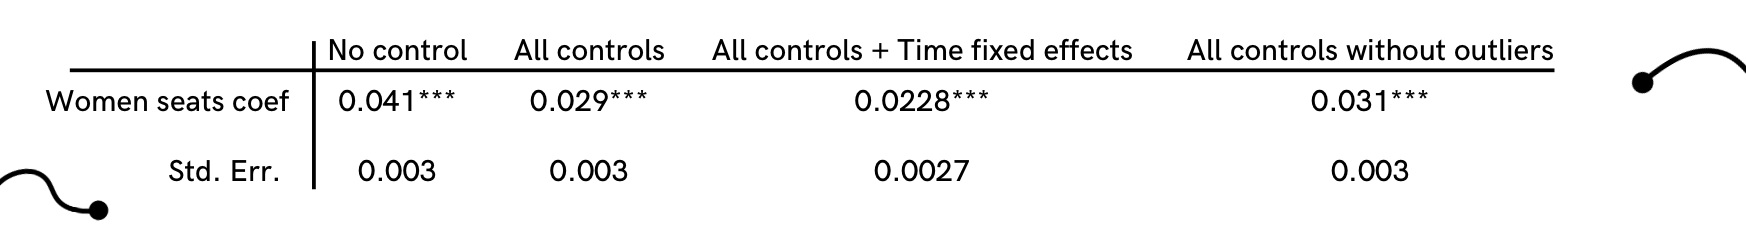

*Table 6: Women seats coefficients and standard errors overview across OLS rgressions*

In the OLS leg of our analytical journey, we meticulously constructed a model that incorporated a series of control variables, which led to a statistically significant result of 0.029\*\*\* (Table 6). This significant coefficient indicates that an increase in the share of women in parliament is associated with a heightened stringency of environmental policies. Upon introducing fixed effects for years (0.2228\*\*\*) and conducting robustness checks (0.031\*\*\*), the significance and stability of the coefficient were reaffirmed, suggesting that our findings hold even when accounting for temporal trends. However, given the complexity of the processes by which women may influence environmental policy in parliaments, and the inescapable presence of endogeneity, we recognize the need for further strategies.

#Charting New Paths: Tackling Endogeneity with 2SLS Regression 🛤️🔧

![Image Alt Text](https://drive.google.com/uc?id=1JumD9U-ojifffNSacR-6YDYnoxsW8QLa)

As we progress in our journey towards the wondrous realm of causality, we have come upon promising findings. Yet, hurdles remain on the path to clear understanding. In our previous analysis, we observed a robust and significant positive relationship between women's share in parliament and the stringency index. However, the path is complex with several important factors influencing this observed uptick in environmental legislation by women. A key challenge we face is reverse causality; it's possible that governments stringent on environmental issues might also be progressive on diversity matters (Figure 7). Thus, the effect might not stem directly from women's influence but rather from the nature of more progressive governments.

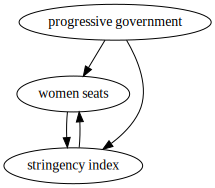

In [170]:
#@title Figure 7: Reverse causality issue
g = gr.Digraph()
g.edge("progressive government", "women seats")
g.edge("progressive government", "stringency index")
g.edge("women seats", "stringency index")
g.edge("stringency index", "women seats")
g

To address this issue of reverse causality, we'll use the electoral experience of females in society as an instrumental variable, proxied by the years since women were granted suffrage. The rationale is straightforward: a country’s historical commitment to female suffrage should significantly influence women's engagement in politics, but it's unlikely to directly affect contemporary policy outcomes. Figure 8 reveals a positive correlation between the average representation of women in national parliaments and the years since women gained suffrage rights. Consistently, our ANOVA test (Table 7) supports this observation, indicating statistically significant differences across groups categorized by the duration of women's suffrage. All this indicates that our instrumental variable seems to fit the model.

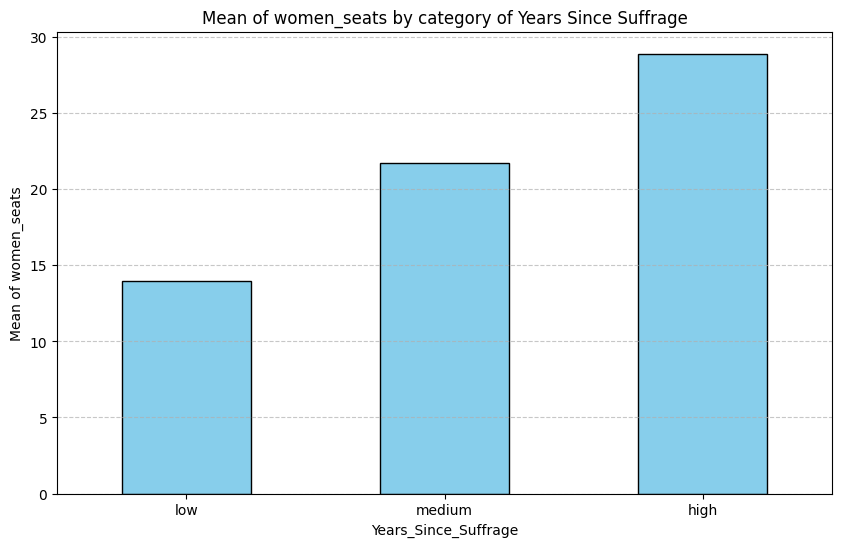

In [171]:
#@title Figure 8: Mean of women_seats by category of Years Since Suffrage
# Creating categories for women_seats based on 10% brackets
df_merged['Years_Since_Suffrage_category'] = pd.cut(df_merged['years_since_suffrage'], bins=[0, 60, 90, 140], labels=['low', 'medium', 'high'])

# Calculating women_seats averages by group
means_by_category = df_merged.groupby('Years_Since_Suffrage_category')['women_seats'].mean()

# Creating a bar graph to display averages
plt.figure(figsize=(10, 6))
means_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Years_Since_Suffrage')
plt.ylabel('Mean of women_seats')
plt.title('Mean of women_seats by category of Years Since Suffrage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [172]:
#@title Table 7: ANOVA Test
# Building a formula for the ANOVA model
model = ols('women_seats ~ C(Years_Since_Suffrage_category)', data=df_merged).fit()

# Running ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                                        sum_sq     df          F        PR(>F)
C(Years_Since_Suffrage_category)  11565.760883    2.0  56.835881  4.968135e-23
Residual                          52399.705466  515.0        NaN           NaN


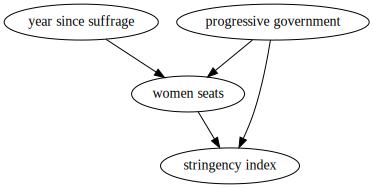

In [173]:
#@title Figure 9: Year since suffrage IV
g = gr.Digraph()
g.edge("progressive government", "women seats")
g.edge("progressive government", "stringency index")
g.edge("women seats", "stringency index")
g.edge("year since suffrage", "women seats")
g

The 2SLS approach unfolds in two stages: The first stage predicts the potentially endogenous variable—women's seats in our case—using the instrumental variable (IV), which is the years since women were granted the right to vote (year since suffrage). It serves as a historical and exogenous source of variation that can be leveraged to tease out the causal influence.
In the second stage, we use the predicted values of women's seats from the first stage as an independent variable to explain the stringency index. This two-step process helps to purify the effect of women's representation from the confounding biases that might otherwise obscure it.
By employing the 2SLS method, we ensure that the relationship we observe between women's seats and policy stringency is not spuriously driven by reverse causality or endogeneity (Figure 10).

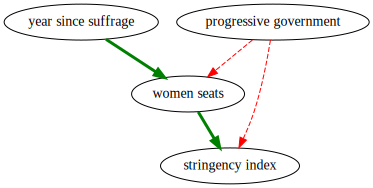

In [174]:
#@title Figure 10: 2SLS intuition
g = gr.Digraph()
g.edge("progressive government", "women seats", color='red', style='dashed')
g.edge("progressive government", "stringency index", color='red', style='dashed')
g.edge("women seats", "stringency index", color='green',penwidth="3.0")
g.edge("year since suffrage", "women seats",color='green',penwidth="3.0")
g

First Stage Regression: In the first stage, our goal is to estimate the independent variable – the share of women in parliament – using our instrumental variable, which is the years since women's suffrage. The regression equation for this stage is:

$$
\text{Women seats}_{it} = \delta_0 + \delta_1 \text{Years since suffrage}_{it} + \delta_2' X_{it} + \mu_{it}
$$

In [175]:
#@title Table 8: First stage
# Step 1: Regression of 'women_seats' on 'years_since_suffrage' and other controls
first_stage = smf.ols('women_seats ~ years_since_suffrage + log_gdp + polity + openness + education + co2', data=df_merged).fit()
df_merged['Women_Seats_hat'] = first_stage.fittedvalues  # Ajouter la variable prédite au DataFrame

#print(first_stage.summary())
print("years_since_suffrage estimate:, ", first_stage.params["years_since_suffrage"])
print("years_since_suffrage p-value:, ", first_stage.pvalues["years_since_suffrage"])

years_since_suffrage estimate:,  0.25452321295249447
years_since_suffrage p-value:,  1.8196569630795044e-13


We found a significant coefficient of 0.2545 for years_since_suffrage, indicating that longer history of women's suffrage in a country positively correlates with a higher share of women in parliament (Table 8). This significant result validates the relevance of our chosen instrumental variable. key result c'est que note IV influence de manière significative notre variable ind women

Second Stage Regression: In the second stage, we use these predicted values of women's share from the first stage as an independent variable to estimate its impact on the stringency index. The regression equation for this stage is:

$$
\text{Stringency index}_{it} = \delta_0 + \delta_1 \hat{\text{Women seats}}_{it} + \delta_2' X_{it} + \mu_{it}
$$

In [176]:
#@title Table 9: Second stage
# Step 2: Regression of 'Stringency_Index' on the predicted variable 'Women_Seats_hat' and other controls
second_stage = smf.ols('stringency_index ~ Women_Seats_hat + log_gdp + polity + openness + education + co2', data=df_merged).fit()
#print(second_stage.summary())
print("Women_Seats_hat estimate:, ", second_stage.params["Women_Seats_hat"])
print("Women_Seats_hat p-value:, ", second_stage.pvalues["Women_Seats_hat"])


Women_Seats_hat estimate:,  0.024045740491440096
Women_Seats_hat p-value:,  0.025751466093751056


The coefficient for Women_Seats_hat is 0.0240, which is statistically significant (Table 9). This suggests that an increase in women's representation in parliament, influenced by the historical length of women’s suffrage, is associated with stricter environmental policies. It is noteworthy that this coefficient is smaller than what we observed in the standard OLS analysis (0.029***). The OLS estimates may have been biased due to reverse causality or omitted variable bias, which the 2SLS approach aims to correct by using the instrumental variable. Overall, these results support the causal relationship we hypothesized while addressing reverse causality concerns. However, the reliability of these findings depends on the assumptions of the instrumental variable’s exogeneity and the absence of omitted variables correlated with both the instrumental and dependent variables.

#Diving into Diversity: Exploring Heterogeneity in Our Findings 🤿🌍




![Image Alt Text](https://drive.google.com/uc?id=19Tw6S81wa_rP0uwY4-U-o-u-6CRDHvDZ)

As we continue our quest to isolate the causal effect of women's representation in parliament on environmental policy stringency, we must navigate another critical aspect of causality: **heterogeneity**. This concept suggests that the effect we are studying might not be uniform across all contexts.

At the beginning of our journey, we hypothesized that fertility rates, a proxy for women's degree of empathy, could strengthen the relationship between our two main variables. This hypothesis finds support in Figure 11, where we observe a notable trend: **countries with higher fertility rates exhibit a more robust correlation between women's parliamentary representation and environmental policy stringency**.

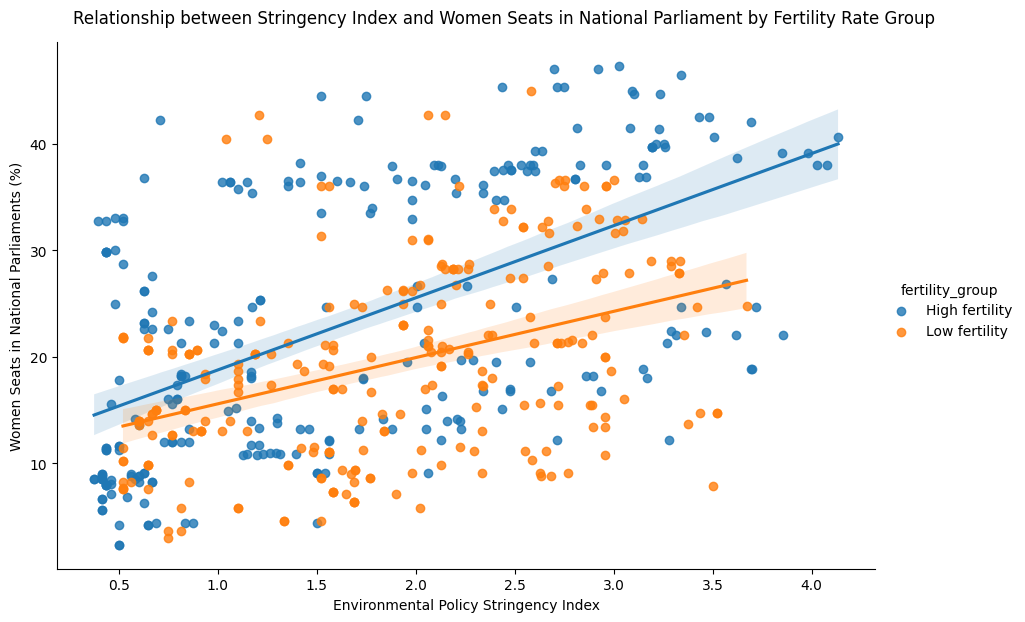

In [177]:
#@title Figure 11: Heterogeneity in correlation
# Calculate the median of fertility_rate
fertility_median = df_merged['fertility_rate'].median()

# Create a new column to indicate if fertility_rate is above or below the median
df_merged['fertility_group'] = ['High fertility' if x > fertility_median else 'Low fertility'
                                               for x in df_merged['fertility_rate']]

# Plot the scatter plot with two regression lines using lmplot
lm = sns.lmplot(x='stringency_index',
                y='women_seats',
                hue='fertility_group',
                data=df_merged,
                height=6,
                aspect=1.5)

lm.set_axis_labels("Environmental Policy Stringency Index", "Women Seats in National Parliaments (%)")
lm.fig.suptitle("Relationship between Stringency Index and Women Seats in National Parliament by Fertility Rate Group", y=1.03)

plt.show()

Going back to our OLS regression and applying it to each fertility rate subset (i.e., above and below median) will allow us to better understand how and why the relationship between female parliamentary representation and environmental policy stringency might vary across different levels of fertility rates.

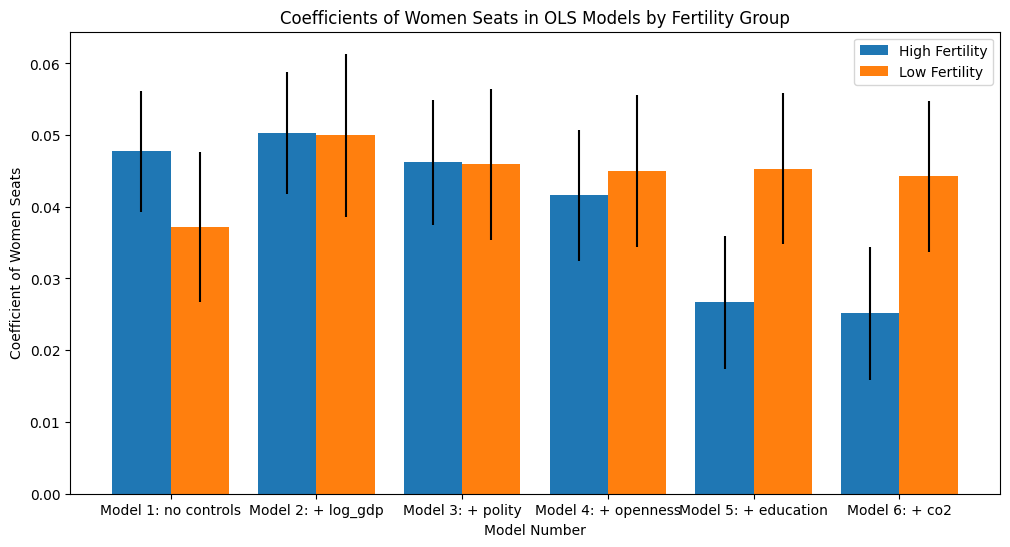

In [178]:
#@title Figure 12: Heterogeneity in OLS Regression

# Define a function to run multiple OLS regressions
def run_ols_regressions(df):
    models = [
        smf.ols('stringency_index ~ women_seats', data=df).fit(),
        smf.ols('stringency_index ~ women_seats + log_gdp', data=df).fit(),
        smf.ols('stringency_index ~ women_seats + log_gdp + polity', data=df).fit(),
        smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness', data=df).fit(),
        smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness + education', data=df).fit(),
        smf.ols('stringency_index ~ women_seats + log_gdp + polity + openness + education + co2', data=df).fit()
    ]
    return models

# Descriptions of control variables for each model
model_descriptions = [
    'Model 1: no controls',
    'Model 2: + log_gdp',
    'Model 3: + polity',
    'Model 4: + openness',
    'Model 5: + education',
    'Model 6: + co2'
]

# Split the dataset into low and high fertility subsets
df_low_fertility = df_merged[df_merged['fertility_rate'] <= fertility_median]
df_high_fertility = df_merged[df_merged['fertility_rate'] > fertility_median]

# Run OLS regressions for low and high fertility subsets
models_low_fertility = run_ols_regressions(df_low_fertility)
models_high_fertility = run_ols_regressions(df_high_fertility)

# Extracting coefficients and confidence intervals from OLS models
def extract_coefficients(models):
    coeffs = [model.params['women_seats'] for model in models]
    lower_bounds = [model.conf_int().loc['women_seats', 0] for model in models]
    upper_bounds = [model.conf_int().loc['women_seats', 1] for model in models]
    return coeffs, lower_bounds, upper_bounds

coeffs_low, lb_low, ub_low = extract_coefficients(models_low_fertility)
coeffs_high, lb_high, ub_high = extract_coefficients(models_high_fertility)

# Indices for plotting
indices = np.arange(len(coeffs_low))

# Creating bar graphs for coefficients
plt.figure(figsize=(12, 6))
plt.bar(indices - 0.2, coeffs_high, 0.4, label='High Fertility', yerr=[np.subtract(coeffs_high, lb_high), np.subtract(ub_high, coeffs_high)])
plt.bar(indices + 0.2, coeffs_low, 0.4, label='Low Fertility', yerr=[np.subtract(coeffs_low, lb_low), np.subtract(ub_low, coeffs_low)])
plt.xlabel('Model Number')
plt.ylabel('Coefficient of Women Seats')
plt.title('Coefficients of Women Seats in OLS Models by Fertility Group')
plt.xticks(indices, model_descriptions)
plt.legend()
plt.show()

Figure 12 reveals that the influence of women in parliament on environmental policy stringency is not only about the strength of impact but also about the reliability and consistency of this impact across different socio-economic contexts (i.e., taking all our control variables into account). In high fertility countries, even though the coefficients might be lower than in low fertility contexts, they often exhibit more consistent statistical significance across various models.  Therefore, women's representation seems to be a more consistent predictor of stringent environmental policies when fertility rates are high, despite a potentially smaller magnitude of impact compared to low fertility contexts.

Going one step further, we can also isolate the effect from potential endogeneity issues by examining heterogeneity in our 2SLS regression.

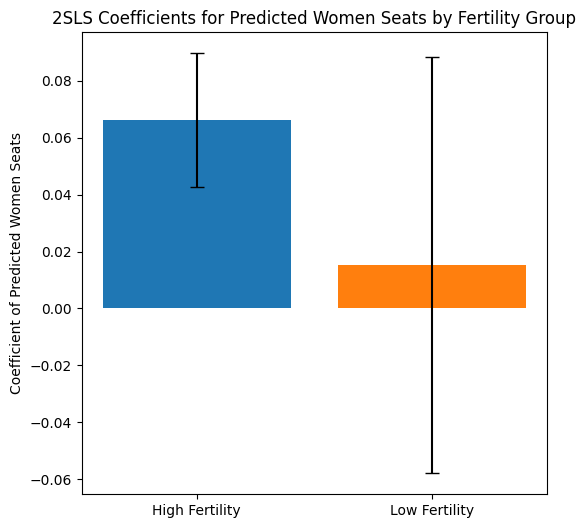

In [179]:
#@title Figure 13: Heterogeneity in 2SLS Regression

# Create a copy of the low fertility subset
df_low_fertility = df_merged[df_merged['fertility_rate'] <= fertility_median].copy()

# First Stage for Low Fertility Subset
first_stage_low = smf.ols('women_seats ~ years_since_suffrage + log_gdp + polity + openness + education + co2', data=df_low_fertility).fit()
df_low_fertility['Women_Seats_hat'] = first_stage_low.fittedvalues

# Second Stage for Low Fertility Subset
second_stage_low = smf.ols('stringency_index ~ Women_Seats_hat + log_gdp + polity + openness + education + co2', data=df_low_fertility).fit()

# Create a copy of the low fertility subset
df_high_fertility = df_merged[df_merged['fertility_rate'] > fertility_median].copy()

# First Stage for High Fertility Subset
first_stage_high = smf.ols('women_seats ~ years_since_suffrage + log_gdp + polity + openness + education + co2', data=df_high_fertility).fit()
df_high_fertility['Women_Seats_hat'] = first_stage_high.fittedvalues

# Second Stage for High Fertility Subset
second_stage_high = smf.ols('stringency_index ~ Women_Seats_hat + log_gdp + polity + openness + education + co2', data=df_high_fertility).fit()

# Bar Graphs for 2SLS Coefficients
coeff_2sls_low = second_stage_low.params['Women_Seats_hat']
coeff_2sls_high = second_stage_high.params['Women_Seats_hat']
ci_low = second_stage_low.conf_int().loc['Women_Seats_hat']
ci_high = second_stage_high.conf_int().loc['Women_Seats_hat']
error_low = [[coeff_2sls_low - ci_low[0]], [ci_low[1] - coeff_2sls_low]]
error_high = [[coeff_2sls_high - ci_high[0]], [ci_high[1] - coeff_2sls_high]]

plt.figure(figsize=(6, 6))
plt.bar('High Fertility', coeff_2sls_high, yerr=error_high, capsize=5)
plt.bar('Low Fertility', coeff_2sls_low, yerr=error_low, capsize=5)
plt.ylabel('Coefficient of Predicted Women Seats')
plt.title('2SLS Coefficients for Predicted Women Seats by Fertility Group')
plt.show()

The 2SLS analysis (Figure 13) also reveals a distinct difference in how women's representation in governance impacts environmental policy stringency across countries with different fertility rates. The estimated coefficient for the share of women in parliaments is 0.066 for the high fertility subset (statistically significant), and 0.015 for the low fertility one (not statistically significant). Thus, in countries with higher fertility rates, women's representation appears to have a more pronounced and statistically significant impact on environmental policy stringency.


Integrating insights from all three analytical angles, the relationship between women's representation and environmental policy stringency seems both intricate and context-dependent. While women's roles in parliament universally hold significance, their impact on environmental policies is markedly more pronounced and decisively influential in high fertility contexts. This heterogeneity supports our initial mechanism and highlights the importance of considering demographic and socio-economic factors in policy development and underscores the nuanced ways in which gender representation can influence environmental governance.

#Mapping Future Expeditions: Discussing Limitations and Extensions 🗺️🔭



![Image Alt Text](https://drive.google.com/uc?id=12Z-jG_sQA0d-aXuvwmH17PJtAHc-FGxa)


As we reach the culmination of our exploration into the impact of women's representation in national parliaments on environmental policy stringency, we pause to reflect upon the journey, critically examining the path we have traversed and envisaging future directions.

**<h3>Key Findings</h3>**

Our findings hint at a potential causal relationship between the proportion of women in parliament and the stringency of a country's environmental policies.

There is a clear positive relationship between the share of women in parliament and the Environmental Policy Stringency Index. This correlation suggests that as the proportion of women in parliamentary seats increases, so does the stringency of environmental policies. In our Ordinary Least Squares (OLS) regression model, the coefficient for the variable representing women's seats was positive and consistently significant across various model specifications. This indicates that the relationship is not merely correlational but potentially causal. When we introduced a range of control variables into our OLS model (such as GDP per capita and political regime), the coefficient for women’s parliamentary share slightly decreased but retained its statistical significance. This highlights that the impact of female representation persists even when accounting for other influential factors.

Moreover, to tackle the potential issue of reverse causality, we employed a two-stage least squares regression using the years since women’s suffrage as an instrumental variable. This method supported our initial findings, further suggesting a causal link between increased female representation and stricter environmental policies. More specifically, it concluded that a 1% increase in women's representation in parliament leads to a 2.4% increase in the country's stringency index. Lastly, we found that the impact of women in parliament on environmental policy stringency was strengthened for countries with higher fertility rates, which also goes in the direction of our initial rationale.

![Image Alt Text](https://drive.google.com/uc?id=1VeZTAPpBjBECny1yMuoUuL46XMe1I8mL)

**<h3>Remaining Limitations**

However, recognizing the limitations of these results and the ever-evolving path to establishing causality, it is important to raise a few questions.

**Is there something else?**

Our regression analyses, while thorough, are not immune to the possibility of omitted variables that could influence the observed relationship. Indeed, the relationship between parliamentary female representation and environmental policy enforcement is complex and influenced by many factors. While adding controls progressively changed the explanatory power of women representation in parliament only slightly, indicating its importance in the impact on environmental policy stringency, an omitted variable bias cannot be fully excluded.

**Is it the reverse?**

The 2SLS approach was instrumental in addressing reverse causality concerns, lending greater credibility to the causal interpretation of our findings.

**Can we extrapolate?**
The generalizability of our results may be limited by two main aspects. First, the dataset's scope, which primarily consists of European countries. This suggests a sample bias and may not fully represent global trends. Second, the study's reliance on a single environmental index raises questions about the breadth of our findings and their applicability to other environmental measures.


**<h3>Future Directions**

The journey towards causality seems to be never ending, and it was even hard for us to stop here. Looking ahead, it could be interesting to bridge the generalizability gap by enriching the geographic and time scope of the considered dataset on the one hand, and considering repeating the study with another environmental index (e.g., CLIMI) on the other hand.

Our attempt at employing a Difference-in-Differences (DiD) approach was hindered by the lack of comparability among the 33 countries in our dataset, as evidenced by placebo tests (Appendix 4). Therefore, enriching the data scope would not only improve generalizability, but also also enable the use of other types of statistical techniques to estimate and cross-check the causal relationship between women's parliamentary representation and environmental policy stringency.

Last but not least, future research could go one step further than the stringency of environmental policies, and instead delve into the tangible impact of parliamentary diversity on effective CO2 reduction. Initiating this inquiry with a 3SLS approach, a comprehensive model could be constructed to explore these dynamics further (Appendix 5).


We look forward to possibly embarking on this next exploratory journey in a forthcoming article, unraveling more layers of this intricate causal relationship.

#Appendices

**<h4>Appendix 1: Description of the variables and data sources</h4>**

![Image Alt Text](https://drive.google.com/uc?id=1vgmxgWtO1tOQULwCrH8gAJyDrGTXZUtV)

**<h4>Appendix 2: Basic OLS Regression Table</h4>**




![Image Alt Text](https://drive.google.com/uc?id=1t2GP-IMr9WSLPALygS1cSEwtk1ldDCVr)

**<h4>Appendix 3: OLS Regression Table without outliers </h4>**

![Image Alt Text](https://drive.google.com/uc?id=1-RnZ_Hl9HNYxcANMHtAgVm4igsJHxRGI)

**<h4>Appendix 4: Difference-in-Difference (DiD) </h4>**

![Image Alt Text](https://drive.google.com/uc?id=1VJK4ktV8VJyJmb5PfGypS_cLZqqoV8yA)

In [180]:
#@title DiD calculation Indonesia - Brazil

# Import data from QoG Environmental Indicators Dataset
df_qog = pd.read_excel('https://www.qogdata.pol.gu.se/data/qog_ei_sept21.xlsx')

# Select a subset of variables
df_qog = df_qog[['cname_wb', 'ccodealp', 'year', 'oecd_eps']].copy()

# Rename & select columns
df_qog.rename(columns={"cname_wb": "country_name", "ccodealp": "country_code", "oecd_eps": "stringency_index"}, inplace=True)
df_qog = df_qog[['country_name','country_code', 'year', 'stringency_index']]


#Creation of a DF with only needed Data of Indonesia and Brazil
columns_to_keep = ['country_name', 'year', 'stringency_index']

df_did_bi = df_qog[((df_qog['country_name'] == 'Indonesia') |
                              (df_qog['country_name'] == 'Brazil')) &
                              (df_qog['year'] >= 1995) &
                              (df_qog['year'] <= 2012)][columns_to_keep]
df_merged.reset_index(inplace=True)

df_merged_bi = pd.merge(df_did_bi[['country_name', 'year', 'stringency_index']],
                        df_merged[['country_name', 'year', 'quota']],
                        on=['country_name', 'year'],
                        how='left')

# Set the value of 0 where 'quota' is NaN
df_merged_bi['quota'] = df_merged_bi['quota'].fillna(0).astype(int)


# Creation of the table for DiD calculation
unique_years = df_merged_bi['year'].unique()
unique_countries = df_merged_bi['country_name'].unique()

df_did_table = pd.DataFrame(index=unique_years, columns=unique_countries)
df_did_table['quota_effect'] = None


for year in df_did_table.index:

    # Finding the quota value for Indonesia in the specific year
    quota_value = df_merged_bi[(df_merged_bi['year'] == year) & (df_merged_bi['country_name'] == 'Indonesia')]['quota'].values

    # Assigning the quota value and the lag effect of 2 years
    if len(quota_value) > 0:
        df_did_table.at[year, 'quota_effect'] = quota_value[0]

    condition = df_did_table.index < 2010
    df_did_table.loc[condition, 'quota_effect'] = 0

    # Loop over the countries in the columns
    for country in df_did_table.columns[:-1]:
        # Findding the stringency_index value for the specific year and country
        value = df_merged_bi[(df_merged_bi['year'] == year) & (df_merged_bi['country_name'] == country)]['stringency_index'].values
        # Assigning the value to df_did_table
        df_did_table.at[year, country] = value[0] if len(value) > 0 else None

# Calculation of the differences in means
results_did = df_did_table.groupby('quota_effect').mean()
results_did['Indonesia']-results_did['Brazil']

# Diffindiff result
(results_did['Indonesia']-results_did['Brazil']).diff()

quota_effect
0         NaN
1    0.773611
dtype: float64

In [181]:
#@title PLACEBO test to check

# Creating a treatment dummy: 1 if Indonesia and year >= 2010, 0 otherwise
df_merged_bi['treatment'] = ((df_merged_bi['country_name'] == 'Indonesia') & (df_merged_bi['year'] >= 2010)).astype(int)

# Creating a post-treatment dummy: 1 if year >= 2010, 0 otherwise
df_merged_bi['post'] = (df_merged_bi['year'] >= 2010).astype(int)

# Interaction term for the difference-in-differences (DID) estimation
df_merged_bi['treatment_post'] = df_merged_bi['treatment'] * df_merged_bi['post']

# Difference-in-Differences regression model
did_model = smf.ols('stringency_index ~ treatment + post + treatment_post', data=df_merged_bi).fit()

# Now, shuffle the treatment group for the placebo test while keeping the post-treatment period constant
# This shuffles the 'treatment' within the 'post' period only
df_merged_bi['placebo_treatment'] = df_merged_bi['treatment']
df_merged_bi.loc[df_merged_bi['post'] == 1, 'placebo_treatment'] = np.random.permutation(df_merged_bi[df_merged_bi['post'] == 1]['treatment'])

# Recalculate the interaction term for the placebo test
df_merged_bi['placebo_treatment_post'] = df_merged_bi['placebo_treatment'] * df_merged_bi['post']

# Placebo Difference-in-Differences regression model
placebo_did_model = smf.ols('stringency_index ~ placebo_treatment + post + placebo_treatment_post', data=df_merged_bi).fit()

# Print the results
print("Actual DID Model Summary")
print(did_model.summary())
print("\nPlacebo DID Model Summary")
print(placebo_did_model.summary())

Actual DID Model Summary
                            OLS Regression Results                            
Dep. Variable:       stringency_index   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     286.2
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.42e-21
Time:                        16:12:05   Log-Likelihood:                 58.247
No. Observations:                  36   AIC:                            -110.5
Df Residuals:                      33   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          

**<h4>Appendix 5: 3SLS</h4>**


$$
\text{Women seats} = \beta_0 + \beta_1 \text{Years Since Suffrage} +
\beta_2 \text{GDP} + \beta_3 \text{Openness} + \beta_4 \text{Education} + \beta_5 \text{Polity} + \epsilon
$$

$$
\text{Stringency index} = \gamma_0 + \gamma_1 \text{Women seats} + \gamma_2 \text{GDP} + \gamma_3 \text{Openness} + \gamma_4 \text{Education} + \gamma_5 \text{Polity} + \mu
$$


$$
\text{CO2} = \alpha_0 + \alpha_1 \text{Stringency Index} + \alpha_2 \text{GDP} + \alpha_3 \text{Openness} + \alpha_4 \text{Education} + \alpha_5 \text{Polity} + \alpha_6 \text{C(year)} + \nu
$$


In [182]:
#@title 3SLS results
df_merged_reset = df_merged.reset_index()
# Définition des équations
eq1 = 'women_seats ~ 1 + years_since_suffrage + log_gdp + openness + education + polity'
eq2 = 'stringency_index ~ 1 + women_seats + log_gdp + openness + education + polity'
eq3 = 'co2 ~ 1 + stringency_index + log_gdp + openness + education + polity + C(year)'

# Créer un dictionnaire des équations
equations = {
    'women_seats': eq1,
    'stringency_index': eq2,
    'CO2': eq3
}


from linearmodels.system import IV3SLS

# Créer le modèle 3SLS
model_3sls = IV3SLS.from_formula(equations, df_merged_reset)
results_3sls = model_3sls.fit()



# Extraire les résultats ajustés pour l'équation 'CO2'
co2_results = results_3sls.equations['CO2']

# Extraire le coefficient et la valeur p pour 'stringency_index' dans l'équation 'CO2'
coef_stringency_index = co2_results.params['stringency_index']
p_value_stringency_index = co2_results.pvalues['stringency_index']

# Afficher les résultats
print("Coefficient for Stringency Index in CO2 equation:", coef_stringency_index)
print("P-value for Stringency Index in CO2 equation:", p_value_stringency_index)



Coefficient for Stringency Index in CO2 equation: 0.28974006583430806
P-value for Stringency Index in CO2 equation: 0.1030225253127417


**<h4>Appendix 6: Github Repository</h4>**
https://github.com/vgentile98/zebraproject

#References

[1] Greenberg et al. 2022. Sex and age differences in “theory of mind” across 57 countries using the English version of the “Reading the Mind in the Eyes” Test. Proc Natl Acad Sci U S A. 120(1).

[2] Warrier et al. 2018. Genome-wide analyses of self-reported empathy: correlations with autism, schizophrenia, and anorexia nervosa. Transl Psychiatry. 8(1), 35.

[3] Wolf et al. 2021. The Salience of Children Increases Adult Prosocial Values. Social Psychological and Personality Science. 13(1), 160-169.

[4] Gilligan, C., 1982. In a Different Voice. Harvard University Press.
Beutel, A.M., Marini, M.M., 1995. Gender and values. Am. Socio. Rev. 60 (3), 436–448.

[5] McCright, A.M., 2010. The effects of gender on climate change knowledge and concern in the American public. Popul. Environ. 32 (1), 66–87.

[6] McCright, A.M., Dunlap, R.E., 2011. Cool dudes: the denial of climate change among conservative white males in the United States. Global Environ. Change. 21 (4), 1163–1172.

[7] Mavisakalyan and Tarverdi, 2019. "Gender and climate change: Do female parliamentarians make difference?," European Journal of Political Economy, Elsevier. 56(C), 151-164.


[8] Frediksson and Neumayer, 2013. Democracy and Climate Change Policies: Is History Important?. Ecological Economics 95, 11-19.

[9] Murdoch and Sandler 1997. The voluntary provision of a pure public good: the case of reduced CFC emissions and the Montreal Protocol. J. Publ. Econ. 63 (3), 331–349.

[10] Farzin and Bond 2006. Democracy and environmental quality. Journal of Development Economics. 81 (1), 213-235.

[11] Hughes et al. 2017. Quota Adoption and Reform Over Time (QAROT), 1947-2015. Ann Arbor, MI: Inter-university Consortium for Political and Social Research (distributor).

[12] Women UN, 2011. Progress of the World’s Women: in Pursuit of Justice. UN Women.

[13] Marshall et al. 2016. Polity IV PROJECT Political Regime Characteristics
and Transitions, 1800-2016.
